# House Price Prediction in Boston

In this project, I trained and tested a linear regression model on data collected from houses in Boston, Massachusetts. I then evaluated the performance and predictive power of the model. This model can be used to make predictions regarding house prices.

The dataset for this project originates from the https://archive.ics.uci.edu/ml/datasets/Housing .The Boston Housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston


For the purpose of this project, I have taken the following steps for preprocessing.
    1. I replaced data points that contains missing values with the median
    2. The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
    4. The feature 'MEDV' has been multiplicatively scaled to account for 44 years of market inflation.

First off, I start with reading the data, and separating features and prices for homes into different pandas dataframes

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit


%matplotlib inline

# load the dataset
data = pd.read_csv(r'C:\Users\Disleve Kanku\Downloads\HousingData.csv')
prices = data['MEDV']*21000
features = data.drop('MEDV', axis = 1)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Data Exploration

In this section, I further explore the dataset.

The main goal of the project is to develop a model which can predict house prices, therefore i separated the dataset into features and a target variable. the features, 'RM', 'LSTAT', and 'PTRATIO', provides quantitative information about each data point. The target variable, 'MEDV', will be the target variable. These are stored in features and prices, respectively

## Statistics

I started with some descriptive statistics about the boston housing prices

In [2]:
min_price = np.min(prices)
max_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("statistics for Boston Housing dataset: \n")
print(" Minimum price: ${:,.2f}".format(min_price))
print(" Maximum price: ${:,.2f}".format(max_price))
print(" Mean price: ${:,.2f}".format(mean_price))
print(" Mediun price: ${:,.2f}".format(median_price))
print(" Standard deviation of prices: ${:,.2f}".format(std_price))

statistics for Boston Housing dataset: 

 Minimum price: $105,000.00
 Maximum price: $1,050,000.00
 Mean price: $473,188.93
 Mediun price: $445,200.00
 Standard deviation of prices: $192,948.24


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Cleaning missing data

In [4]:
features.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [5]:
import statistics as sts
median = sts.median(features.LSTAT.dropna())
features['LSTAT'].fillna(median, inplace=True)

## Hypothesis

I used three features from the dataset to help me make predictions.'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Without building a model, let's try to figure out if an increase in the value of a feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'.

'RM': An increase in the value of this feature will lead to an increase in the value of 'MEDV'. This is because for you'd expect a home with a higher number of rooms to be more expensive that a home with lower number of rooms.
'LSTAT': An increase in the value of this feature will lead to a decrease in the value of 'MEDV'. A lower class homeowner might not be able to afford expensive houses, so you'd expect them to leave in a cheaper home. A higher percentage of such people could correlate to cheaper homes in an area, and thus, a lower 'MEDV' value.
'PTRATIO': An increase in the value of this feature will lead to an decrease in the value of 'MEDV'. A low student to teacher ration is typically associated with better education level of a school, as a teacher is able to focus on individual students better (than if there were more students). So, due to the presence of better quality schools, people might be willing to pay more to live in those areas, to provide their children with better education, and the prices might be higher

## Feature selection

In [6]:
features.drop(features.columns[[0, 1,2,3,4,6,7,8,9,11]], axis=1, inplace=True)
features.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,11.43


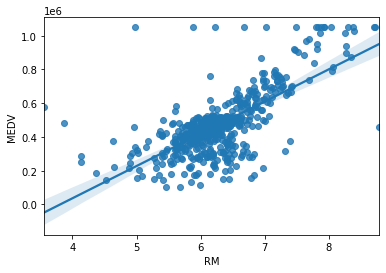

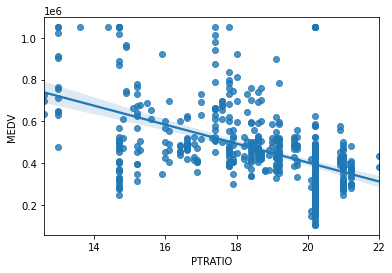

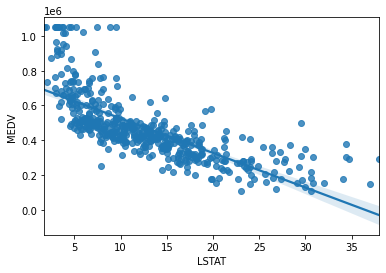

In [7]:
# scatter plot to verify my hypothesis
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(x=data[var],y=prices)
    plt.show()

## Model development

## Split Data

Split the data into a training and testing set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.3,random_state=100)

# success
print("Training and testing split was successful")

Training and testing split was successful


by splitting the data data into a training and testing set. we can train our model with the data from the training set, feed our model with unseen data from the testing set to evaluate the performance of our model

## Fitting a model

I trained my model using the Linear regression algorithm

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
    
    

## Making Predictions

Once the model has been training with the training set, it make be used to make predictions using the testing set.

In [10]:
y_pred = reg.predict(X_test)
y_pred

array([754452.16648095, 615004.04718555, 442864.94227673, 396774.46287988,
       431361.39048055, 577390.60126326, 555471.2634594 , 492790.47097412,
       445769.70866972, 425418.14887503, 563065.77539497, 336067.07999102,
       466064.08442152, 358490.30451682, 796265.51444165, 580832.58121848,
       636272.9006448 , 348667.50906776, 717478.68822371, 851855.32693312,
       708201.74893841, 456339.05977694, 419445.4001843 , 379149.74472328,
       405671.36174077, 341603.02208692, 607984.66427488, 394164.71479216,
       360665.17170519, 452845.3739078 , 347627.93246616, 477219.66764441,
       815957.71922663, 521171.00030478, 635501.62169183, 639728.97434867,
       413591.39635022, 410448.11227656, 320033.66519316, 457355.61285988,
       517697.33438246, 463990.9529171 , 358752.11097676, 494255.12904535,
       623616.55006918, 605764.92821485, 397126.35692405, 393539.14959962,
       345980.80776318, 359403.54564136, 512938.87169226, 400945.78460403,
       525859.31669096, 5

In this section, I develop the tools needed to help my model make predictions. Being able to make accurate evaluations of my model's performance will help reinforce the confidence in my predictions

## Implementation: Define a Performance Metric

For this project, I calculated the coefficient of determination, R^2 to help quantify my model's performance. This metric will help me define how "good" my model is at making predictions.

The values of R^2 range from 0 to 1, it captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score((y_test),(y_pred))
print('r2 score:',r2)

r2 score: 0.6470760935535507


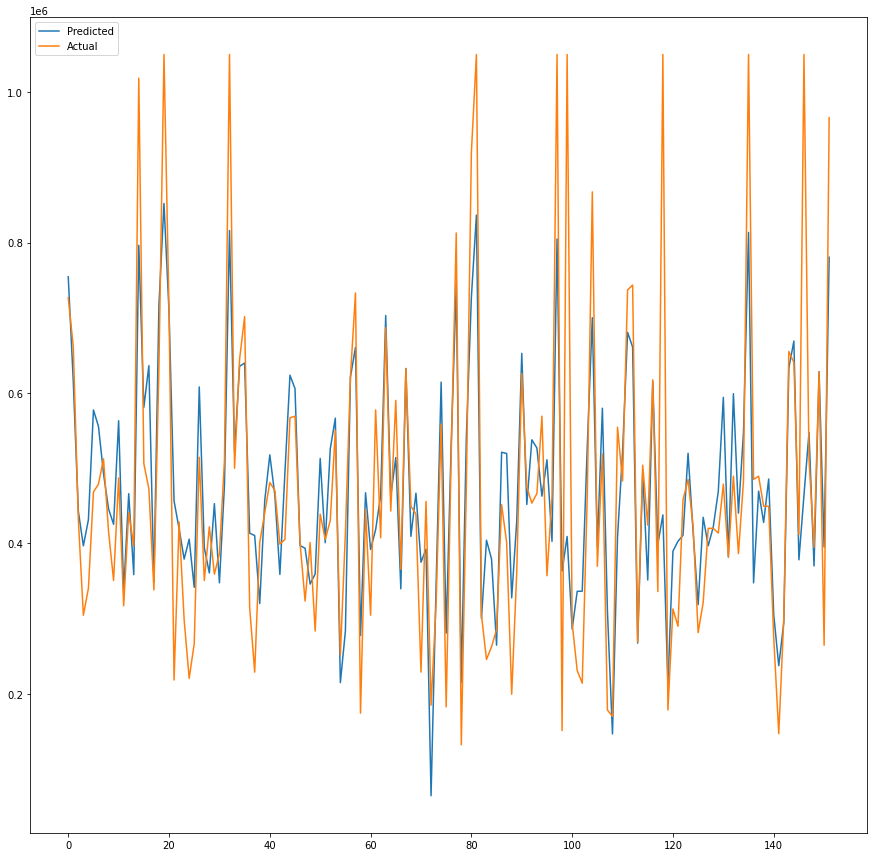

In [12]:
plt.figure(figsize=(15, 15))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()